<center> <font size=12>Capstone Navantia - Graphs Notebook

<center><img src="https://images.unsplash.com/photo-1634542984003-e0fb8e200e91?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=869&q=80">

# 1. Setup

In [ ]:
# Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Create a dataframe for each csv file

# define folder path containing all the csv files
directory_path = "/content/results"

# Create a list with all the file names
filenames = os.listdir(directory_path)

# Create a list with the df names made of the file names minus the end (_results.csv)
# Create a new list to store the modified filenames
df_names = []
# Loop through each filename in the original list
for filename in filenames:
    df_names.append(filename[:-12])

# Create multiple dataframes using the file path and name
for filename, df_name in zip(filenames, df_names):
  # read csv file and assign to dataframe with matching df_name
  globals()[df_name] = pd.read_csv(os.path.join(directory_path, filename))

# Check results 
fasterrcnn_mobilenetv3_large_320_fpn.head(5)

,epoch,map,map_05,train loss,train cls loss,train box reg loss,train obj loss,train rpn loss
0,1,0.313902,0.659577,1.487914,0.726844,0.756967,0.035551,0.011735
1,2,0.371935,0.727589,0.869060,0.398177,0.707902,0.017112,0.008118
2,3,0.396285,0.744772,0.725182,0.347523,0.711016,0.014269,0.007053
3,4,0.402511,0.758670,0.689489,0.313560,0.694360,0.013130,0.006606
4,5,0.341410,0.687287,0.994256,0.292916,0.688020,0.012034,0.006402


# 2. mAP 50-95

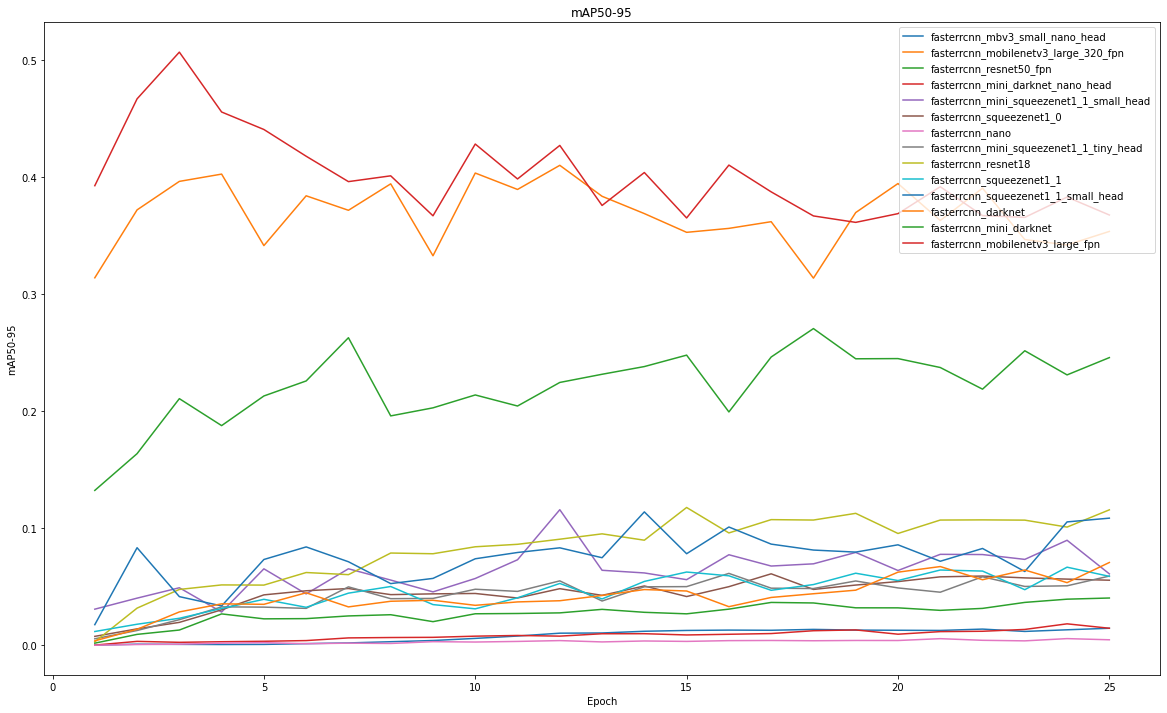

In [ ]:
import matplotlib.pyplot as plt

# set the figure size
plt.figure(figsize=(20, 12))

# loop over dataframes and plot the map vs epoch
for df_name in df_names:
    plt.plot(globals()[df_name]['epoch'], globals()[df_name]['map'], label=df_name)

# add axis labels and legend
plt.xlabel('Epoch')
plt.ylabel('mAP50-95')
plt.legend(loc='upper right')

# add a title
plt.title('mAP50-95')

# show the plot
plt.show()

# 3. mAP 50

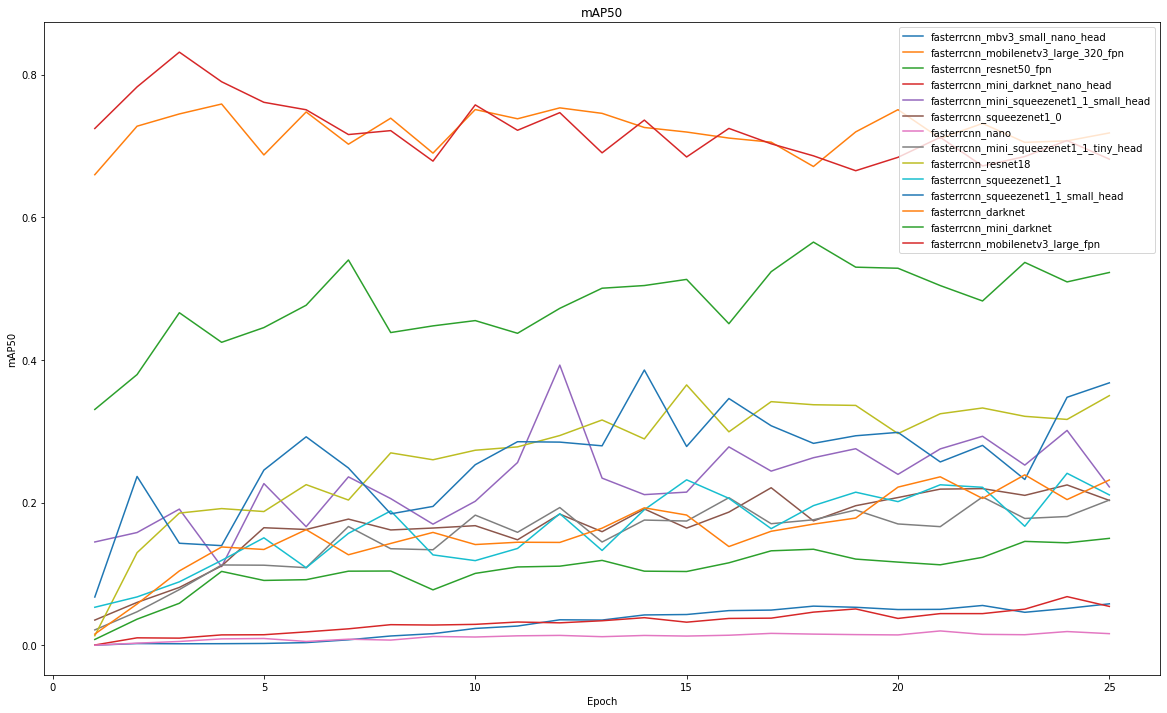

In [ ]:
import matplotlib.pyplot as plt

# set the figure size
plt.figure(figsize=(20, 12))

# loop over dataframes and plot the map vs epoch
for df_name in df_names:
    plt.plot(globals()[df_name]['epoch'], globals()[df_name]['map_05'], label=df_name)

# add axis labels and legend
plt.xlabel('Epoch')
plt.ylabel('mAP50')
plt.legend(loc='upper right')

# add a title
plt.title('mAP50')

# show the plot
plt.show()

# 4. Best mAP 50-95 table

In [ ]:
# create a list of tuples with df name and max map value
max_maps = []
for df_name in df_names:
    max_map = globals()[df_name]['map'].max()
    max_maps.append((df_name, max_map))

# create a pandas DataFrame from the list
df_max_maps = pd.DataFrame(max_maps, columns=['df_name', 'max_map'])

df_max_maps

,df_name,max_map
0,fasterrcnn_mbv3_small_nano_head,0.014445
1,fasterrcnn_mobilenetv3_large_320_fpn,0.410009
2,fasterrcnn_resnet50_fpn,0.270511
3,fasterrcnn_mini_darknet_nano_head,0.018226
4,fasterrcnn_mini_squeezenet1_1_small_head,0.115742
5,fasterrcnn_squeezenet1_0,0.060965
6,fasterrcnn_nano,0.005596
7,fasterrcnn_mini_squeezenet1_1_tiny_head,0.061326
8,fasterrcnn_resnet18,0.117646
9,fasterrcnn_squeezenet1_1,0.066642


In [ ]:
df_max_maps.to_excel("top_mAP.xlsx") 